In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np

class Perceptron(object):
 
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta #학습률 에타는 0.01로 초기화
        self.epochs = epochs #epochs는 50으로 초기화
 
    def train(self, X, y):
 
        self.w_ = np.ones(1 + X.shape[1]) #바이어스 노드를 포함해서 가중치 값을 0으로 초기화
        self.errors_ = [] #스텝마다 몇 개의 결과 값이 틀렸는지 저장하는 리스트
 
        for _ in range(self.epochs): #epoch만큼 반복
            error = 0
            for xi, target in zip(X, y): #모든 입력 노드들을 돌면서 가중치 업데이트
                update = self.eta * (target - self.predict(xi)) #결과값과 목표값의 차이를 학습률과 곱한다.
                self.w_[1:] +=  update * xi#가중치들을 업데이트
                self.w_[0] +=  update #이 코드에서 바이어스 노드 가중치를 업데이트 할때는 입력 값을 곱하지 않는다.
            error = (y != self.predict(X)).sum()
            self.errors_.append(error) #에러 리스트에 에러값을 마지막에 붙인다.
        return self
 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #입력 X와 각 가중치를 행렬 곱하고 바이어스 노드의 가중치를 더한다.
 
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) #0.0보다 크거나 같은 값은 1로 아니면 -1로 초기화

In [36]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

print(df)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
 
# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
5    5.4  3.9  1.7  0.4     Iris-setosa
6    4.6  3.4  1.4  0.3     Iris-setosa
7    5.0  3.4  1.5  0.2     Iris-setosa
8    4.4  2.9  1.4  0.2     Iris-setosa
9    4.9  3.1  1.5  0.1     Iris-setosa
10   5.4  3.7  1.5  0.2     Iris-setosa
11   4.8  3.4  1.6  0.2     Iris-setosa
12   4.8  3.0  1.4  0.1     Iris-setosa
13   4.3  3.0  1.1  0.1     Iris-setosa
14   5.8  4.0  1.2  0.2     Iris-setosa
15   5.7  4.4  1.5  0.4     Iris-setosa
16   5.4  3.9  1.3  0.4     Iris-setosa
17   5.1  3.5  1.4  0.3     Iris-setosa
18   5.7  3.8  1.7  0.3     Iris-setosa
19   5.1  3.8  1.5  0.3     Iris-setosa
20   5.4  3.4  1.7  0.2     Iris-setosa
21   5.1  3.7  1.5  0.4     Iris-setosa
22   4.6  3.6  1.0  0.2     Iris-setosa
23   5.1  3.3  1.7  0.5     Iris-setosa


Weights: [ 0.6  -0.62  1.1 ]


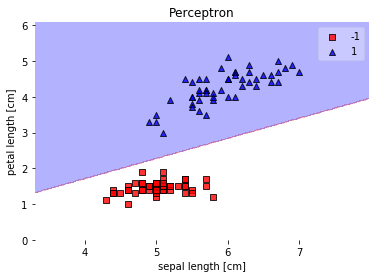

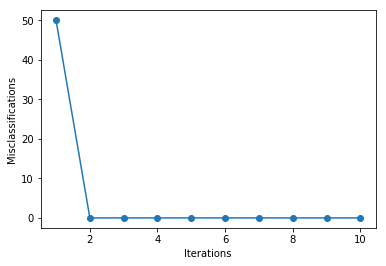

In [37]:
ppn = Perceptron(epochs=10, eta=0.1) #학습률과 epoch 초기화
 
ppn.train(X, y)
print('Weights: %s' % ppn.w_) #각 가중치 값들 출력
plot_decision_regions(X, y, clf=ppn) 
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()
 
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')#매 스탭마다 몇 개가 에러가 났는지 출력
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

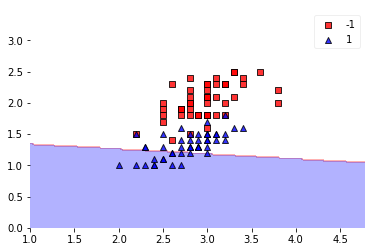

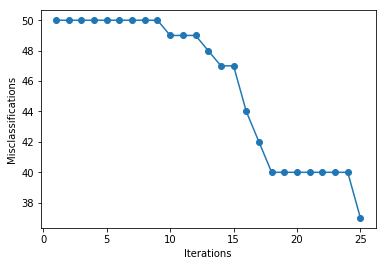

In [49]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)
 
# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values
 
ppn2 = Perceptron(epochs=25, eta=0.01)
ppn2.train(X2, y2)
 
plot_decision_regions(X2, y2, clf=ppn2)
plt.show()
 
plt.plot(range(1, len(ppn2.errors_)+1), ppn2.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [42]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn2.predict(X2)).sum())

Total number of misclassifications: 37 of 100


In [43]:
class Perceptron_zeroweight(object):
 
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta #학습률 에타는 0.01로 초기화
        self.epochs = epochs #epochs는 50으로 초기화
 
    def train(self, X, y):
 
        self.w_ = np.zeros(1 + X.shape[1]) #바이어스 노드를 포함해서 가중치 값을 0으로 초기화
        self.errors_ = [] #스텝마다 몇 개의 결과 값이 틀렸는지 저장하는 리스트
 
        for _ in range(self.epochs): #epoch만큼 반복
            error = 0
            for xi, target in zip(X, y): #모든 입력 노드들을 돌면서 가중치 업데이트
                update = self.eta * (target - self.predict(xi)) #결과값과 목표값의 차이를 학습률과 곱한다.
                self.w_[1:] +=  update * xi#가중치들을 업데이트
                self.w_[0] +=  update #이 코드에서 바이어스 노드 가중치를 업데이트 할때는 입력 값을 곱하지 않는다.
            error = (y != self.predict(X)).sum()
            self.errors_.append(error) #에러 리스트에 에러값을 마지막에 붙인다.
        return self
 
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] #입력 X와 각 가중치를 행렬 곱하고 바이어스 노드의 가중치를 더한다.
 
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) #0.0보다 크거나 같은 값은 1로 아니면 -1로 초기화

Weights: [-0.4  -0.68  1.82]


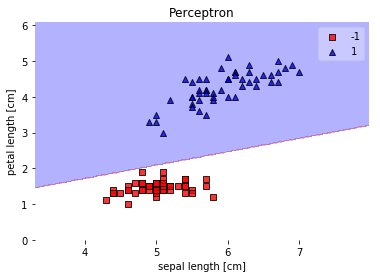

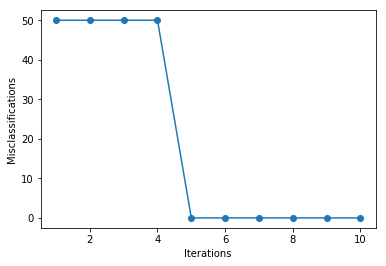

In [46]:
ppn3 = Perceptron_zeroweight(epochs=10, eta=0.1) #학습률과 epoch 초기화
 
ppn3.train(X, y)
print('Weights: %s' % ppn3.w_) #각 가중치 값들 출력<p></p><p>
plot_decision_regions(X, y, clf=ppn3) #이 코드는 나중에 분석해 보자...
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()
 
plt.plot(range(1, len(ppn3.errors_)+1), ppn3.errors_, marker='o')#매 스탭마다 몇 개가 에러가 났는지 출력
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

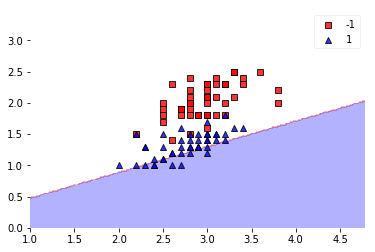

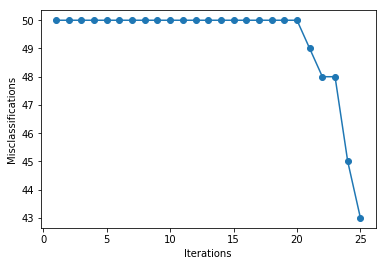

In [47]:
# versicolor and virginica
y2 = df.iloc[50:150, 4].values
y2 = np.where(y2 == 'Iris-virginica', -1, 1)
 
# sepal width and petal width
X2 = df.iloc[50:150, [1,3]].values
 
ppn4 = Perceptron_zeroweight(epochs=25, eta=0.01)
ppn4.train(X2, y2)
 
plot_decision_regions(X2, y2, clf=ppn4)
plt.show()
 
plt.plot(range(1, len(ppn4.errors_)+1), ppn4.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [48]:
print('Total number of misclassifications: %d of 100' % (y2 != ppn4.predict(X2)).sum())

Total number of misclassifications: 43 of 100
